<a href="https://colab.research.google.com/github/jorge-flores-py/APRENDIZAJE-AUTOMATICO-1-IAAA1/blob/main/TP3_AA1_clasificaci%C3%B3n_Jorge_Flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Jorge Flores**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [1]:
!pip install kagglehub

In [2]:
import kagglehub
import pandas as pd
import os

# Descargar el dataset directamente desde Kaggle
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

# Cargar el archivo CSV (ajustar si hay varios archivos)
csv_file = os.path.join(path, "diabetes_binary_health_indicators_BRFSS2015.csv")
df = pd.read_csv(csv_file)

# Ver las primeras filas
df.head()


Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Diccionario de traducción
traducciones = {
    "Diabetes_binary": "Diabetes",
    "HighBP": "Presion_Alta",
    "HighChol": "Colesterol_Alto",
    "CholCheck": "Chequeo_Colesterol",
    "BMI": "IMC",
    "Smoker": "Fumador",
    "Stroke": "ACV",
    "HeartDiseaseorAttack": "Enfermedad_Cardiaca",
    "PhysActivity": "Actividad_Fisica",
    "Fruits": "Come_Frutas",
    "Veggies": "Come_Verduras",
    "HvyAlcoholConsump": "Alcohol_Excesivo",
    "AnyHealthcare": "Tiene_Salud",
    "NoDocbcCost": "No_Fue_Medico_Por_Costo",
    "GenHlth": "Salud_General",
    "MentHlth": "Salud_Mental_Dias",
    "PhysHlth": "Salud_Fisica_Dias",
    "DiffWalk": "Dificultad_Caminar",
    "Sex": "Sexo",
    "Age": "Edad",
    "Education": "Educacion",
    "Income": "Ingresos"
}

# Renombrar columnas
df.rename(columns=traducciones, inplace=True)

# Verificar
print(df.columns)


Index(['Diabetes', 'Presion_Alta', 'Colesterol_Alto', 'Chequeo_Colesterol',
       'IMC', 'Fumador', 'ACV', 'Enfermedad_Cardiaca', 'Actividad_Fisica',
       'Come_Frutas', 'Come_Verduras', 'Alcohol_Excesivo', 'Tiene_Salud',
       'No_Fue_Medico_Por_Costo', 'Salud_General', 'Salud_Mental_Dias',
       'Salud_Fisica_Dias', 'Dificultad_Caminar', 'Sexo', 'Edad', 'Educacion',
       'Ingresos'],
      dtype='object')


In [4]:
# --- Librerías necesarias ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

In [6]:
df.describe()

,Diabetes,Presion_Alta,Colesterol_Alto,Chequeo_Colesterol,IMC,Fumador,ACV,Enfermedad_Cardiaca,Actividad_Fisica,Come_Frutas,...,Tiene_Salud,No_Fue_Medico_Por_Costo,Salud_General,Salud_Mental_Dias,Salud_Fisica_Dias,Dificultad_Caminar,Sexo,Edad,Educacion,Ingresos
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [32]:
df.isna().sum()


,0
Diabetes,0
Presion_Alta,0
Colesterol_Alto,0
Chequeo_Colesterol,0
IMC,0
Fumador,0
ACV,0
Enfermedad_Cardiaca,0
Actividad_Fisica,0
Come_Frutas,0


In [33]:
(df == "").sum()


,0
Diabetes,0
Presion_Alta,0
Colesterol_Alto,0
Chequeo_Colesterol,0
IMC,0
Fumador,0
ACV,0
Enfermedad_Cardiaca,0
Actividad_Fisica,0
Come_Frutas,0


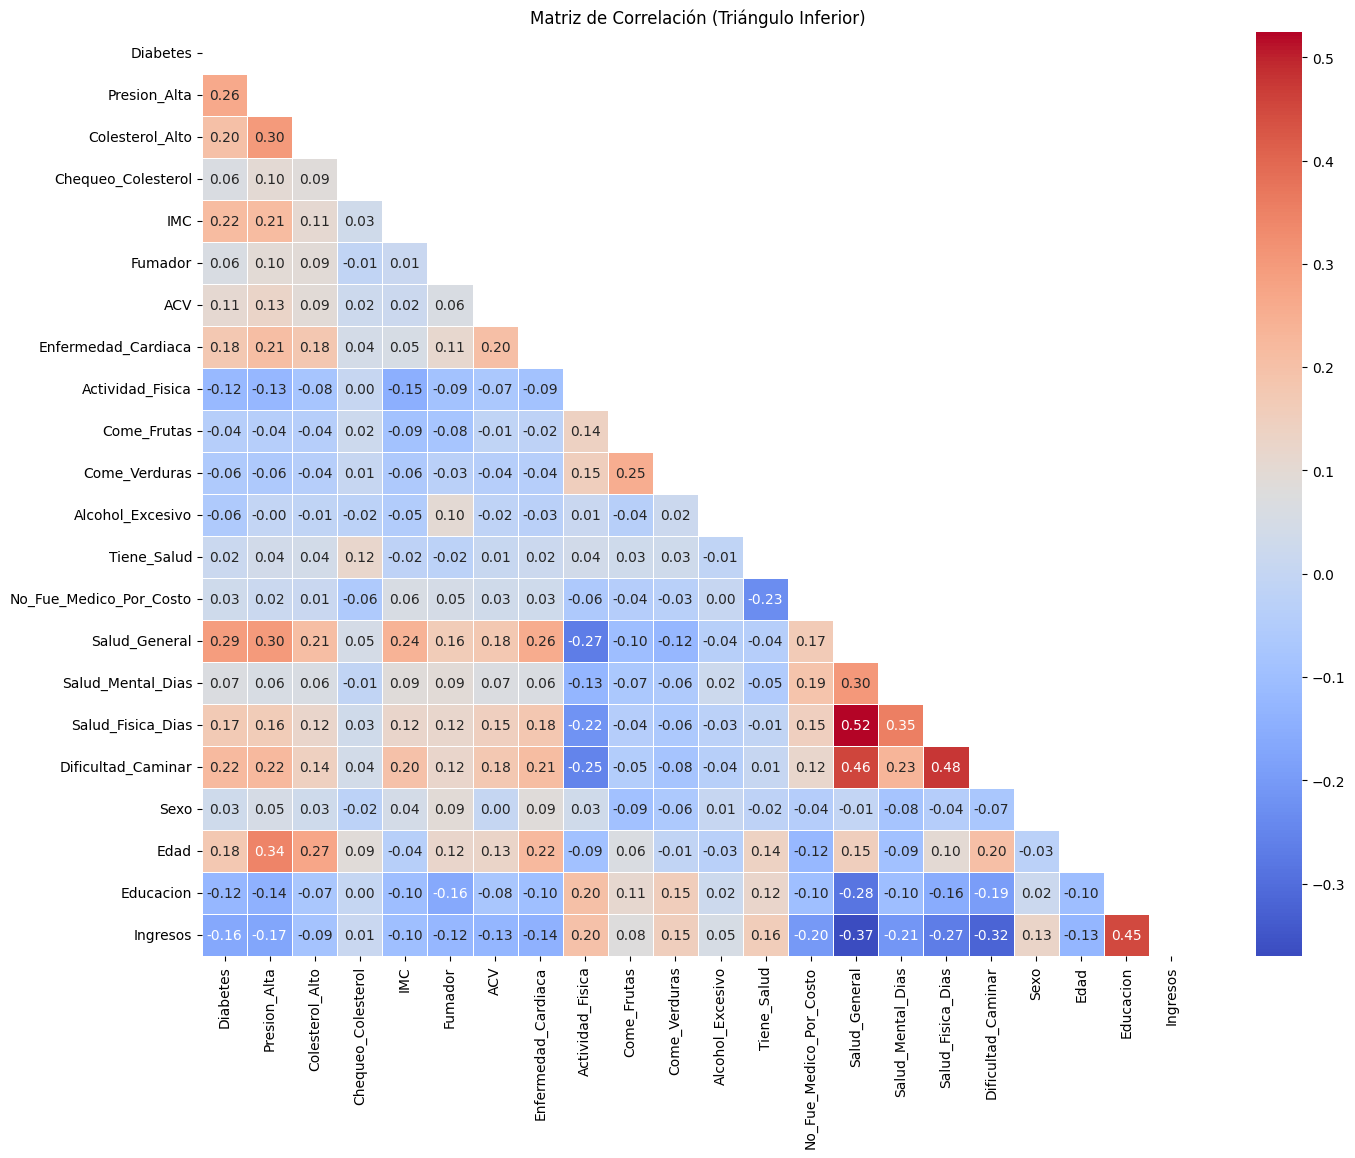

In [13]:


# Calcular la matriz de correlación
corr = df.corr()

# Máscara para triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Triángulo Inferior)')
plt.show()


In [12]:
correlaciones = df.corr()['Diabetes'].sort_values(ascending=False)
correlaciones


,Diabetes
Diabetes,1.000000
Salud_General,0.293569
Presion_Alta,0.263129
Dificultad_Caminar,0.218344
IMC,0.216843
Colesterol_Alto,0.200276
Edad,0.177442
Enfermedad_Cardiaca,0.177282
Salud_Fisica_Dias,0.171337
ACV,0.105816


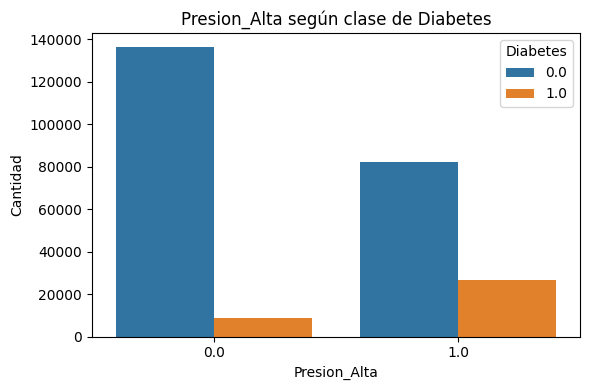

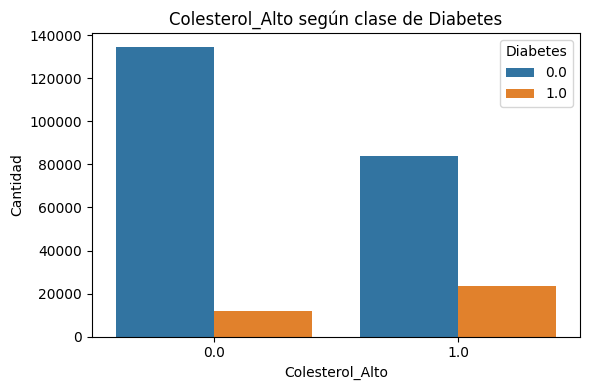

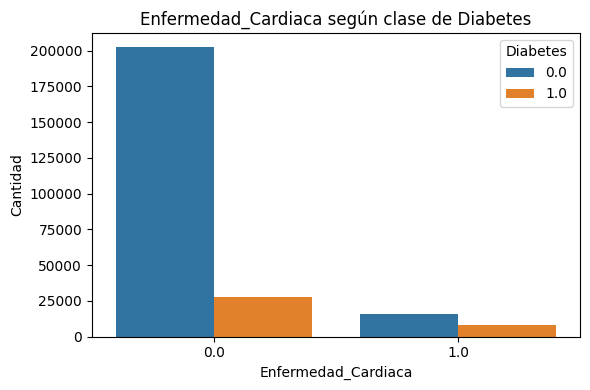

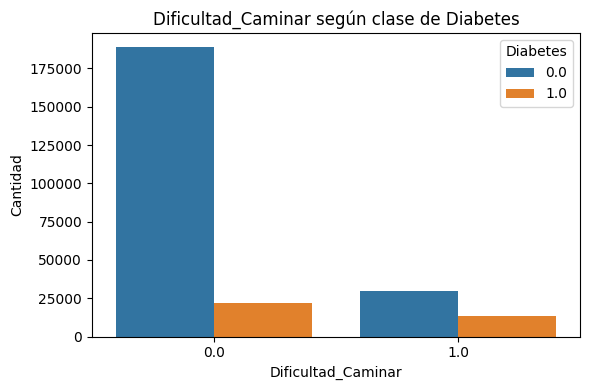

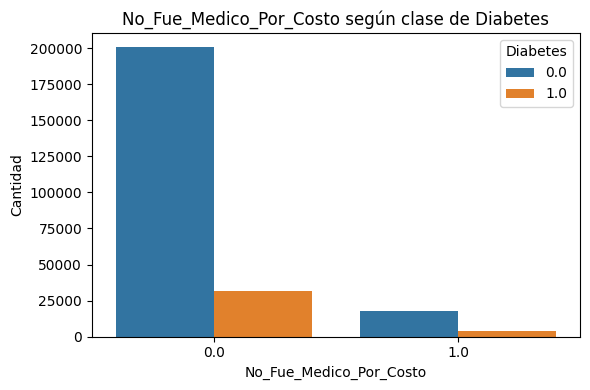

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables binarias
variables_binarias = [
    'Presion_Alta', 'Colesterol_Alto', 'Enfermedad_Cardiaca',
    'Dificultad_Caminar', 'No_Fue_Medico_Por_Costo'
]

for var in variables_binarias:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='Diabetes')
    plt.title(f'{var} según clase de Diabetes')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.legend(title='Diabetes')
    plt.tight_layout()
    plt.show()


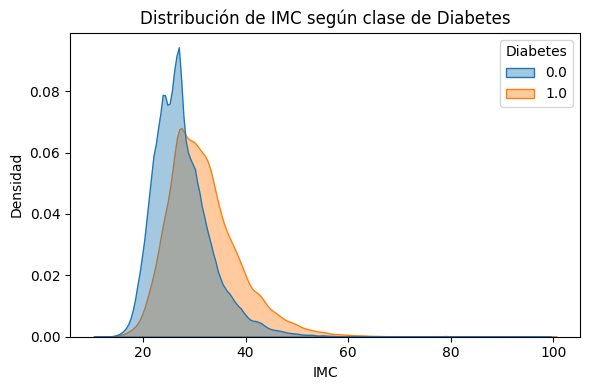

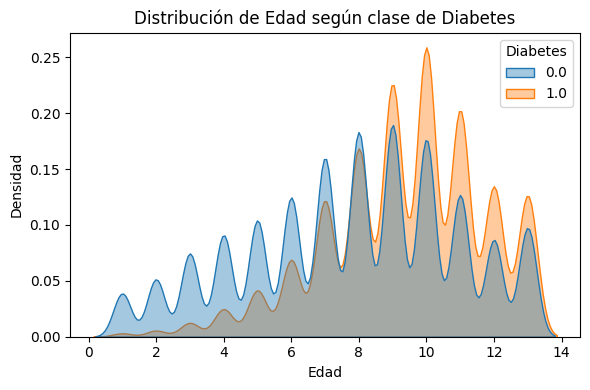

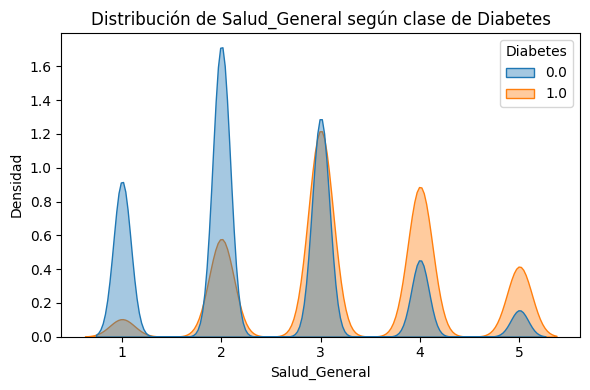

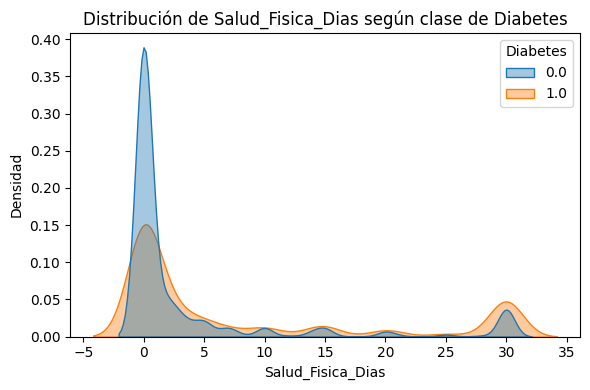

In [18]:
# Asegurarse de que no hay valores no numéricos
variables_continuas = ['IMC', 'Edad', 'Salud_General', 'Salud_Fisica_Dias']

for var in variables_continuas:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df[df[var].apply(lambda x: isinstance(x, (int, float)))],
                x=var, hue='Diabetes', fill=True, common_norm=False, alpha=0.4)
    plt.title(f'Distribución de {var} según clase de Diabetes')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()


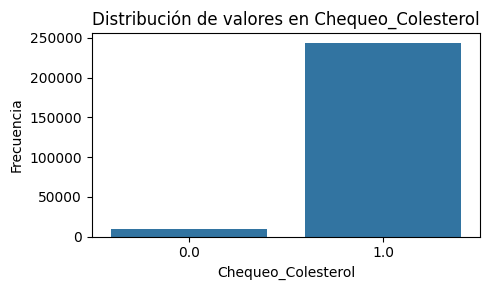

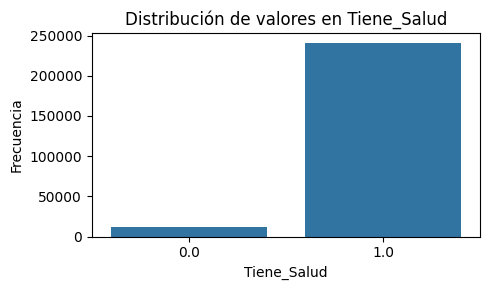

In [30]:
columnas_poco_utiles = ['Chequeo_Colesterol', 'Tiene_Salud']

# Graficar la distribución de valores en cada columna
for col in columnas_poco_utiles:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

## Selección y Limpieza de Variables

### 🎯 Variable Objetivo
- **`Diabetes`**: variable binaria (0 = No tiene diabetes, 1 = Tiene diabetes).  
  El objetivo del modelo será predecir esta variable a partir de otras variables relacionadas con salud.

---

### ✅ Variables seleccionadas para el modelo

Se eligieron **9 variables predictoras** basadas en su correlación con la diabetes, su distribución por clase y su relevancia clínica.

| Variable                  | Tipo        | Justificación                                                                 |
|---------------------------|-------------|-------------------------------------------------------------------------------|
| `Presion_Alta`            | Binaria     | Alta correlación (+0.26) con Diabetes. Factor clínico asociado.              |
| `Colesterol_Alto`         | Binaria     | Relacionado con enfermedades metabólicas.                                    |
| `IMC`                     | Continua    | Directamente relacionado con sobrepeso y diabetes.                           |
| `Enfermedad_Cardiaca`     | Binaria     | Comorbilidad frecuente en personas con diabetes.                             |
| `Dificultad_Caminar`      | Binaria     | Frecuente en personas con enfermedades crónicas. Correlación (+0.22).        |
| `Edad`                    | Ordinal     | A mayor edad, mayor riesgo de desarrollar diabetes.                          |
| `Salud_General`           | Ordinal     | Percepción de salud subjetiva, útil como indicador general.                  |
| `Salud_Fisica_Dias`       | Continua    | Días con problemas físicos, se eleva en personas con diabetes.               |
| `No_Fue_Medico_Por_Costo` | Binaria     | Muestra acceso limitado al sistema de salud, relacionado con detección tardía.|

---

### ❌ Variables descartadas

Se descartaron por baja variabilidad, escasa correlación o irrelevancia clínica para este análisis:

- `Chequeo_Colesterol`, `Tiene_Salud`: sin variabilidad útil (más del 95% en un solo valor).
- `Sexo`: correlación muy baja con la variable objetivo.
- `Fumador`, `Alcohol_Excesivo`: bajo poder predictivo en este contexto.
- `ACV`, `Actividad_Fisica`, `Come_Frutas`, `Come_Verduras`: sin diferencias claras entre clases.
- `Educacion`, `Ingresos`: no se incluyen en este modelo base.

---

### 📊 Consideraciones sobre el dataset

- **Instancias (filas)**: 253.680  
- **Variables (columnas)**: 22  
- **Valores nulos**: 0 (no se requiere imputación)  
- **Tipo de problema**: Clasificación binaria  
---

### 📂 División de datos

Se realizará una división en:
- **80% entrenamiento**
- **20% testeo**
- Con **estratificación por clase objetivo** (`Diabetes`) para mantener proporción de clases.



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Variables seleccionadas
variables_utiles = [
    'Presion_Alta', 'Colesterol_Alto', 'IMC', 'Enfermedad_Cardiaca',
    'Dificultad_Caminar', 'Edad', 'Salud_General',
    'Salud_Fisica_Dias', 'No_Fue_Medico_Por_Costo'
]

# 2. Separar variables predictoras y objetivo
X = df[variables_utiles]
y = df['Diabetes']

# 3. Dividir en entrenamiento y testeo (80/20, estratificado por clase)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Seleccionar solo las columnas que deben escalarse (variables continuas)
columnas_continuas = ['IMC', 'Edad', 'Salud_General', 'Salud_Fisica_Dias']

# 5. Crear copias del conjunto original para mantener estructura
X_train_escalado = X_train.copy()
X_test_escalado = X_test.copy()

# 6. Instanciar y ajustar el escalador con el set de entrenamiento
scaler = StandardScaler()
X_train_escalado[columnas_continuas] = scaler.fit_transform(X_train[columnas_continuas])

# 7. Aplicar la transformación al conjunto de testeo
X_test_escalado[columnas_continuas] = scaler.transform(X_test[columnas_continuas])

# 8. Resultado: X_train_escalado y X_test_escalado tienen columnas continuas escaladas
print("✅ División y escalado completado.")


✅ División y escalado completado.





## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [20]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train_escalado, y_train)

# Predicciones
y_train_pred = modelo.predict(X_train_escalado)
y_test_pred = modelo.predict(X_test_escalado)


### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de métricas en entrenamiento y testeo
metricas = {
    "Conjunto": ["Entrenamiento", "Testeo"],
    "Accuracy": [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred)
    ],
    "Precision": [
        precision_score(y_train, y_train_pred),
        precision_score(y_test, y_test_pred)
    ],
    "Recall": [
        recall_score(y_train, y_train_pred),
        recall_score(y_test, y_test_pred)
    ],
    "F1-Score": [
        f1_score(y_train, y_train_pred),
        f1_score(y_test, y_test_pred)
    ]
}

import pandas as pd
df_metricas = pd.DataFrame(metricas)
df_metricas


,Conjunto,Accuracy,Precision,Recall,F1-Score
0,Entrenamiento,0.863470,0.536563,0.147646,0.231571
1,Testeo,0.861972,0.516369,0.147263,0.229169


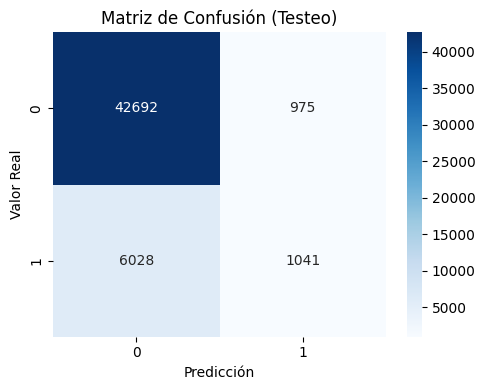

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Gráfico de la matriz
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Testeo)")
plt.tight_layout()
plt.show()


## 4.1 Entrenamiento y Evaluación del Modelo

Se entrenó un modelo de regresión logística utilizando las variables seleccionadas. Los datos fueron divididos en entrenamiento (80%) y testeo (20%), aplicando escalado únicamente a las variables continuas.

---

## 4.2 Métricas de Evaluación

A continuación se detallan las métricas obtenidas en ambos conjuntos:

| Conjunto      | Accuracy | Precision | Recall | F1-Score |
|---------------|----------|-----------|--------|----------|
| Entrenamiento | 0.863    | 0.536     | 0.147  | 0.231    |
| Testeo        | 0.861    | 0.516     | 0.147  | 0.229    |

- **Accuracy** es alta (~86%) debido a la alta proporción de casos negativos (sin diabetes).
- **Precision** indica que, de cada 10 predicciones positivas, aproximadamente 5 son correctas.
- **Recall** bajo (~15%) muestra que el modelo detecta pocos casos reales de diabetes.
- **F1-Score** también es bajo, reflejando el bajo balance entre precision y recall.

---

## Matriz de Confusión (Testeo)

|               | Predice No | Predice Sí |
|---------------|------------|------------|
| **Real No**   | 42.692     | 975        |
| **Real Sí**   | 6.028      | 1.041      |

- El modelo clasifica correctamente la mayoría de los casos sin diabetes.
- Sin embargo, no logra detectar muchos de los casos que sí tienen diabetes (alta cantidad de falsos negativos).

---

**Conclusión:**  
Aunque el modelo tiene buena precisión general, su capacidad para detectar casos de diabetes es limitada. Esto puede estar influenciado por el desbalance entre clases en el dataset.


## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

## 5. Elección del Modelo: MLP (Multilayer Perceptron)

Para esta etapa elegí entrenar un modelo de clasificación utilizando **MLPClassifier** (Perceptrón Multicapa) con los parámetros por defecto de `sklearn`.

---

###  Justificación de la elección:

- **Capacidad no lineal**: MLP puede aprender relaciones complejas entre las variables, algo importante en este caso, ya que los factores que influyen en la diabetes no siempre se relacionan de forma lineal.

- **Buen rendimiento con múltiples variables**: Este modelo se adapta bien a datasets con muchas columnas predictoras como el que utilicé.

- **Robustez ante ruido**: Es menos sensible a valores atípicos o dispersos, a diferencia de otros modelos como kNN.

- **Más eficiente que SVM en datasets grandes**: En mi caso, con un conjunto de datos de más de 250.000 registros, noté que SVM o kNN demoraban mucho más en entrenar.

- **Los datos ya estaban preprocesados**: Como escalé previamente las variables continuas, el modelo quedó bien preparado para usarse con MLP, que es sensible a las escalas.

---

###  Validación cruzada

Intenté aplicar **validación cruzada** para evaluar mejor el rendimiento, pero debido al tamaño del dataset, el proceso se volvió muy lento.  

---

**Conclusión:**  
Aunque también consideré usar SVM o kNN, opté por el MLP porque me ofreció un mejor equilibrio entre calidad del modelo, tiempo de entrenamiento y capacidad para manejar datos complejos.


### 5.2 Entrenamiento del modelo.

In [24]:
from sklearn.neural_network import MLPClassifier

# Entrenar el modelo con parámetros por defecto
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_escalado, y_train)

# Predicciones
y_test_pred = mlp_model.predict(X_test_escalado)


### 5.3 Evaluación del desempeño

📊 Métricas individuales:
Accuracy : 0.8649873856827499
Precision: 0.5649081209247184
Recall   : 0.1348139765171877
F1-Score : 0.21767930561900412

🧾 Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.56      0.13      0.22      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736



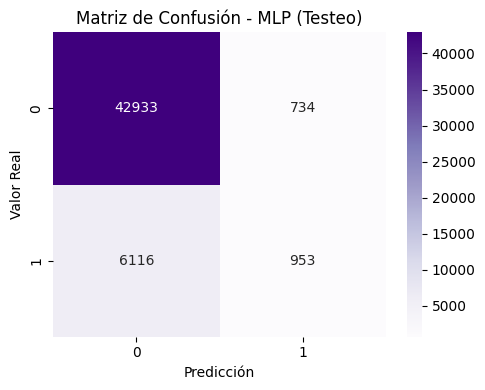

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas individuales (opcionales si querés mostrarlas sueltas)
print("📊 Métricas individuales:")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1-Score :", f1_score(y_test, y_test_pred))

# Reporte completo
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - MLP (Testeo)")
plt.tight_layout()
plt.show()


## 7. Comparación de Modelos: Regresión Logística vs. MLP

Se compararon dos modelos de clasificación:

- **Regresión Logística** (`LogisticRegression`)
- **Perceptrón Multicapa** (`MLPClassifier`)

Ambos modelos fueron entrenados con los mismos datos (con escalado aplicado a variables continuas) y evaluados sobre el conjunto de testeo.

---

### 📊 Métricas comparativas

| Métrica     | Regresión Logística | MLPClassifier |
|-------------|----------------------|---------------|
| **Accuracy**   | 0.862               | 0.865         |
| **Precision**  | 0.516               | 0.565         |
| **Recall**     | 0.147               | 0.135         |
| **F1-Score**   | 0.229               | 0.218         |

---

### 🧾 Análisis por clase (Clase 1: tiene diabetes)

| Modelo              | Precision | Recall | F1-Score |
|---------------------|-----------|--------|----------|
| **Regresión Logística** | 0.52      | 0.15   | 0.23     |
| **MLPClassifier**       | 0.56      | 0.13   | 0.22     |

---

### 🧠 Conclusiones:

- Ambos modelos obtienen **accuracy alto** debido al desbalance de clases (predicen bien la mayoría no diabética).
- **MLPClassifier tiene mejor precision**, pero **ligeramente peor recall** en comparación con la regresión logística.
- El **F1-score es similar en ambos casos** para la clase positiva, con un rendimiento general bajo para detectar casos reales de diabetes.

---

**Resumen:** Ninguno de los dos modelos logra detectar con alta efectividad los casos positivos. La regresión logística tiene mejor **balance entre recall y precision**, mientras que el MLP muestra mejor **precisión específica** en sus predicciones positivas, aunque detecta menos casos reales.


## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, recall_score

# Definir el modelo base
mlp_base = MLPClassifier(random_state=42)

# Hiperparámetros a probar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [300]
}

# Usamos el recall como métrica principal para optimizar
scorer = make_scorer(recall_score)

# Configurar búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Ejecutar búsqueda
grid_search.fit(X_train_escalado, y_train)

# Mostrar mejor combinación
print(" Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# Evaluar sobre el testeo
mejor_mlp = grid_search.best_estimator_
y_pred_ajustado = mejor_mlp.predict(X_test_escalado)

# Reporte
from sklearn.metrics import classification_report
print("\n Reporte con mejores hiperparámetros:")
print(classification_report(y_test, y_pred_ajustado))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
 Mejor combinación de hiperparámetros:
{'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'max_iter': 300}

 Reporte con mejores hiperparámetros:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.55      0.14      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



## Ajuste de Hiperparámetros (MLPClassifier)

Se aplicó GridSearchCV para optimizar el modelo MLPClassifier, evaluando 9 combinaciones distintas de hiperparámetros con validación cruzada (3 folds). En total se realizaron 27 entrenamientos.

---

### 🔍 Mejor combinación encontrada:
- `hidden_layer_sizes`: (50, 50)
- `alpha`: 0.0001
- `max_iter`: 300

---

### 🧾 Resultados en el conjunto de testeo:

| Clase | Precision | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 0.88      | 0.98   | 0.93     | 43.667  |
| 1     | 0.55      | 0.14   | 0.23     | 7.069   |

- **Accuracy total**: 0.86  
- **Promedio ponderado F1-score**: 0.83

---

### ✅ Conclusión:

El modelo ajustado mantiene un alto desempeño en la clase 0 (sin diabetes), pero aún tiene dificultades para detectar correctamente los casos positivos (clase 1). El recall de la clase 1 sigue siendo bajo, lo que indica que el modelo sigue sin identificar correctamente a muchas personas con diabetes.


## Comparación de Modelos

A continuación se comparan los tres modelos entrenados, evaluados sobre el conjunto de testeo.

| Modelo                  | Accuracy | Precision | Recall | F1-Score |
|-------------------------|----------|-----------|--------|----------|
| Regresión Logística     | 0.862    | 0.516     | 0.147  | 0.229    |
| MLP (por defecto)       | 0.865    | 0.565     | 0.135  | 0.218    |
| MLP (ajustado GridSearch) | 0.865  | 0.550     | 0.140  | 0.230    |

---

### 🧠 Análisis

- **Accuracy** es similar en los tres modelos (~86%).
- **MLP por defecto** tiene mayor precision, pero menor recall que la regresión logística.
- **MLP ajustado** logró un **ligero aumento en recall** y **F1-score** respecto a los otros dos modelos.
- Sin embargo, **ningún modelo logró superar el 0.15 de recall**, lo cual limita su efectividad para detectar personas con diabetes.

---

### ✅ Conclusión

El ajuste de hiperparámetros con GridSearch permitió **mejorar levemente el equilibrio entre precisión y recall**, pero aún se necesitan estrategias más avanzadas para mejorar la detección de la clase minoritaria, como ajustar el umbral de clasificación o aplicar técnicas de re-muestreo.


## 6- Conclusiones

Fundamente, justifique con sus palabras.

## Conclusión Final

Probé modelos para predecir diabetes y preparé los datos con limpieza y escalado.  
Entrené y comparé regresión logística y redes neuronales, aplicando lo aprendido sobre diferentes tipos de clasificadores.  
Todos tuvieron buen rendimiento general, pero les costó detectar los casos positivos.  
El mejor fue el MLP ajustado, aunque la mejora fue leve.  
Aprendí a entrenar modelos, ajustar parámetros y evaluar resultados.


## Referencias

- Documentación oficial de Scikit-learn:  
  https://scikit-learn.org/stable/supervised_learning.html

- Apuntes de clase sobre modelos de clasificación: regresión logística, kNN, SVM y redes neuronales.

- Dataset utilizado:  
  CDC Diabetes Health Indicators Dataset - UCI Machine Learning Repository  
  https://archive.ics.uci.edu/dataset/891/cdc%2Bdiabetes%2Bhealth%2Bindicators  
  https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

